In [1]:
import numpy as np
from obspy import read, Trace, Stream
import glob
import matplotlib.pyplot as plt
from obspy.signal.tf_misfit import cwt
from pycwt import wavelet

In [2]:
##### Define fmin, fmax and nf (number of filters) #####
fmin=0.02
fmax=0.25
filters=32

C:\Users\priyanshu gupta\AppData\Roaming\Python\Python38\site-packages\matplotlib\cbook\__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


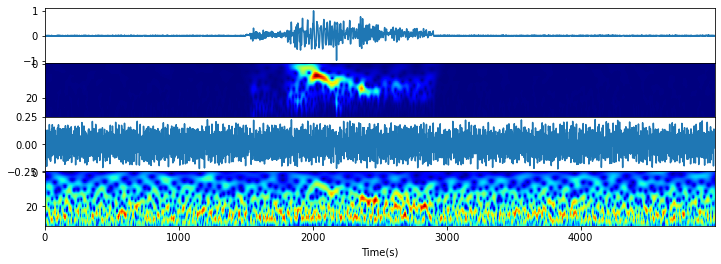

In [3]:
###### Read test data and perform t-f normalization #####
test=read(r'C:\Users\priyanshu gupta\Desktop\syn_signal.sac')
test.normalize()
test.detrend()
test_header=test[0].stats
test_dt=test_header.delta
amplitude, scale = cwt(test[0].data, dt=1, w0=6, fmin=fmin, fmax=fmax, nf=filters)
amplitude_norm = amplitude/np.abs(amplitude)
test_norm=wavelet.icwt(amplitude_norm, scale, 1)

####### Data visualization #######
fig, axs = plt.subplots(4, figsize=(12,4))
axs[0].plot(test[0].data)
axs[1].imshow(np.abs(amplitude), aspect='auto', cmap='jet')
axs[2].plot(test_norm)
amplitude_o, scale = cwt(test_norm, dt=1, w0=6, fmin=fmin, fmax=fmax, nf=filters)
axs[3].imshow(np.abs(amplitude_o), aspect='auto', cmap='jet')
axs[0].margins(x=0)
axs[2].margins(x=0)
plt.subplots_adjust(hspace=0.)
plt.xlabel('Time(s)')

for ax in axs:
    ax.label_outer()

In [6]:
###### Process real data ######
#### here ACSO is station folder containing each day .SAC files #####
path=r'C:\Users\priyanshu gupta\Desktop\mydata\ACSO\\'
files=glob.glob(path+'*.SAC')

In [5]:
for i in range(len(files)):
#     print(files[i][45:])
    st=read(files[i])
    x=st[0].data
    header=read(files[i])[0].stats
    dt=header.delta
    amplitude, scale = cwt(x, dt=dt, w0=6, fmin=fmin, fmax=fmax, nf=filters)
    amplitude_norm = amplitude/np.abs(amplitude)
    x_norm = wavelet.icwt(amplitude_norm, scale, dt=dt)
    amplitude_o, scale = cwt(x_norm, dt=dt, w0=6, fmin=fmin, fmax=fmax, nf=filters)
    x_norm_st=Stream(Trace(x_norm, header=header))
    x_norm_st.write(r'C:\Users\priyanshu gupta\Desktop\mydata_norm\ACSO\\'+files[i][45:], format='sac')
#     plt.imshow(np.abs(amplitude), aspect='auto')
#     plt.show()
#     plt.imshow(np.abs(amplitude_o), aspect='auto')
#     plt.show()

C:\Users\priyanshu gupta\AppData\Roaming\Python\Python38\site-packages\obspy\io\sac\sactrace.py:548: ComplexWarning: Casting complex values to real discards the imaginary part
  value = float(value)
C:\Users\priyanshu gupta\AppData\Roaming\Python\Python38\site-packages\obspy\io\sac\arrayio.py:321: ComplexWarning: Casting complex values to real discards the imaginary part
  data = data.astype(native_str(endian_str + 'f4'))
